In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#import datasets
medals = pd.read_csv('medals_by_country_2016.csv',index_col=0)
Washington_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')
seattle_weather = Washington_weather[Washington_weather['NAME'] == "SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US"]
seattle_weather.reset_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
austin_weather['MONTH'] = months
seattle_weather['MONTH'] =  months
climate_change = pd.read_csv('climate_change.csv')

<ipython-input-13-7117e9c51391>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather['MONTH'] =  months


# 1. Quantitative comparisons: bar-charts
In the previous chapter, you saw how you can turn data into visual descriptions. In this chapter, we will focus on quantitative comparisons between parts of the data.

2. Olympic medals
Let's look at a dataset that contains information about the number of medals won by a few countries in the 2016 Olympic Games. The data is not very large. Here is all of it. Although you can see all of it in front of you, it's not that easy to make comparisons between different countries and see which countries won which medals.

3. Olympic medals: visualizing the data
Let's start by reading the data in from a file. We tell Pandas to create a DataFrame from a file that contains the data and to use the first column, which contains the country names, as the index for the DataFrame. Next, we can visualize the data about gold medals. We create a Figure and an Axes object and call the Axes bar method to create a bar chart. This chart shows a bar for every row in the "Gold" column of the DataFrame, where the height of the bar represents the number in that row. The labels of the x-axis ticks correspond to the index of the DataFrame, which contains the names of the different countries in the data table. Unfortunately, these names are rather long, so they overlap with each other. Let's fix that first.

4. Interlude: rotate the tick labels
To fix these labels, we can rotate them by 90 degrees. This is done by using the set-underscore-xticklabels method of the Axes. We also take the opportunity to add a label on the y-axis, telling us that the height corresponds to the number of medals. This looks good. Visualizing the data in this way shows us which countries got a high or low number of gold medals, but also allows us to see the differences between countries, based on the difference in heights between the bars.

5. Olympic medals: visualizing the other medals
Next, we would like to add the data about the other medals: Silver and Bronze. To add this information into the same plot, we'll create a stacked bar chart. This means that each new data will be stacked on top of the previous data. It starts the same way as before. Next, we add another call to the bar method to add the data from the "Silver" column of the DataFrame. We add the bottom key-word argument to tell Matplotlib that the bottom of this column's data should be at the height of the previous column's data. We add the x-axis tick labels, rotating them by 90 degrees, set the y-axis labels, and call plt-dot-show.

6. Olympic medals: visualizing all three
Similarly, we can add in the number of Bronze medals, setting the bottom of this bar to be the sum of the number of gold medals and the number of silver medals.

7. Stacked bar chart
This is what the full stacked bar chart looks like.

8. Adding a legend
To make this figure easier to read and understand, we would also like to label which color corresponds to which medal. To do this we need to add two things.

9. Adding a legend
The first is to add the label key-word argument to each call of the bar method with the label for the bars plotted in this call. The second is to add a call to the Axes legend method before calling show. This adds in a legend that tells us which color stands for which medal.

10. Stacked bar chart with legend
This is what the figure looks like with the legend.

11. Create a bar chart!
Now, you try!

# Bar chart
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

Instructions
100 XP
Call the ax.bar method to plot the "Gold" column as a function of the country.
Use the ax.set_xticklabels to set the x-axis tick labels to be the country names.
In the call to ax.set_xticklabels rotate the x-axis tick labels by 90 degrees by using the rotation key-word argument.
Set the y-axis label to "Number of medals"

<ipython-input-14-9cb2fc3bd5ac>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation=90)


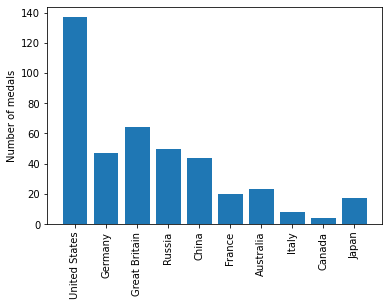

In [14]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index,medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index,rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')


plt.show()

# Stacked bar chart
A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In this exercise, you will have access to a DataFrame called medals that contains an index that holds the names of different countries, and three columns: "Gold", "Silver" and "Bronze". You will also have a Figure, fig, and Axes, ax, that you can add data to.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

Instructions
100 XP
Call the ax.bar method to add the "Gold" medals. Call it with the label set to "Gold".
Call the ax.bar method to stack "Silver" bars on top of that, using the bottom key-word argument so the bottom of the bars will be on top of the gold medal bars, and label to add the label "Silver".
Use ax.bar to add "Bronze" bars on top of that, using the bottom key-word and label it as "Bronze".

<ipython-input-15-60019a512942>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation=90)


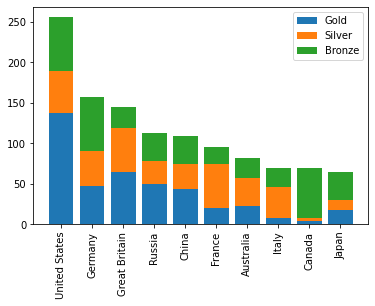

In [15]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")
ax.set_xticklabels(medals.index,rotation=90)

# Display the legend
ax.legend()

plt.show()

# 1. Quantitative comparisons: histograms
Bar-charts show us the value of a variable in different conditions. Now, we're going to look at histograms. This visualization is useful because it shows us the entire distribution of values within a variable.

2. Histograms
Let's look at another example. In this case, we are looking at data about the athletes who participated in the 2016 Olympic Games. We've extracted two DataFrames from this data: all of the medal winners in men's gymnastics and all of the medal winners in men's rowing. Here are the five first rows in the men's rowing DataFrame. You can see that the data contains different kinds of information: what kinds of medals each competitor won, and also the competitor's height and weight.

3. A bar chart again
Let's start by seeing what a comparison of heights would look like with a bar chart. After creating the Figure and Axes objects, we add to them a bar with the mean of the rowing "Height" column. Then, we add a bar with the mean of the gymnastics "Height" column. We set the y-axis label and show the figure, which gives us a sense for the difference between the groups.

4. Introducing histograms
But a histogram would instead show the full distribution of values within each variable. Let's see that. We start again by initializing a Figure and Axes. We then call the Axes hist method with the entire "Height" column of the men's rowing DataFrame. We repeat this with the men's gymnastics DataFrame. In the histogram shown, the x-axis is the values within the variable and the height of the bars represents the number of observations within a particular bin of values. For example, there are 12 gymnasts with heights between 164 and 167 centimeters, so the highest bar in the orange histogram is 12 units high. Similarly, there are 20 rowers with heights between 188 and 192 centimeters, and the highest bar in the blue histogram is 20 units high.

5. Labels are needed
Because the x-axis label no longer provides information about which color represents which variable, labels are really needed in histograms. As before, we can label a variable by calling the hist method with the label key-word argument and then calling the legend method before we call plt-dot-show, so that a legend appears in the figure.

6. Customizing histograms: setting the number of bins
You might be wondering how Matplotlib decides how to divide the data up into the different bars. Per default, the number of bars or bins in a histogram is 10, but we can customize that. If we provide an integer number to the bins key-word argument, the histogram will have that number of bins.

7. Customizing histograms: setting bin boundaries
If we instead provide a sequence of values, these numbers will be set to be the boundaries between the bins, as shown here. There is one last thing to customize. Looking at this figure, you might wonder whether there are any rowing medalists with a height of less than 180 centimeters. This is hard to tell because the bars for the gymnastics histogram are occluding this information.

8. Customizing histograms: transparency
The occlusion can be eliminated by changing the type of histogram that is used. Instead of the "bar" type that is used per default, you can specify a histtype of "step", which displays the histogram as thin lines, instead of solid bars,

9. Histogram with a histtype of step
exposing that yes: there are rowers with a height of less than 180 centimeters.

10. Create your own histogram!
In the exercises to follow, you will create your own histograms.

In [16]:
olympics = pd.read_csv('summer2016.csv')

mens_rowing = olympics[(olympics['Sport'] == 'Rowing') & (olympics['Sex']=='M')] 
mens_gymnastics = olympics[(olympics['Sport']=='Gymnastics') & (olympics['Sex']=='M')]




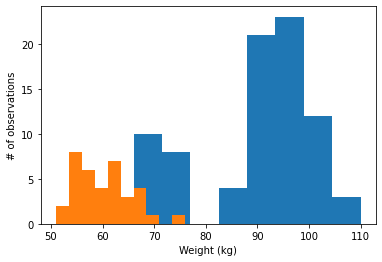

In [17]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

# "Step" histogram
Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

The data is stored in a Pandas DataFrame object called summer_2016_medals that has a column "Height". In addition, you are provided a Pandas GroupBy object that has been grouped by the sport.

In the exercise below, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

Instructions
100 XP
Use the hist method to display a histogram of the "Weight" column from the mens_rowing DataFrame, label this as "Rowing".
Use hist to display a histogram of the "Weight" column from the mens_gymnastics DataFrame, and label this as "Gymnastics".
For both histograms, use the 'histtype' argument to visualize the data using the 'step' type and set the number of bins to use to 5.
Add a legend to the figure, before it is displayed.

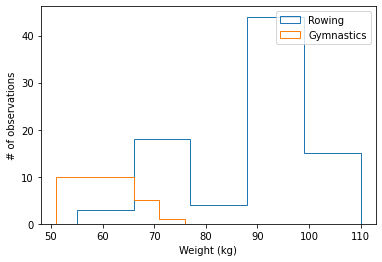

In [18]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"],histtype='step',bins=5,label='Rowing')


# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"],histtype='step',bins=5,label='Gymnastics')


ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

# 1. Statistical plotting
In the previous lesson, you saw how to create histograms that compare distributions of data. How can we make these comparisons more formal? Statistical plotting is a set of methods for using visualization to make comparisons. Here, we'll look at two of these techniques.

2. Adding error bars to bar charts
The first is the use of error bars in plots. These are additional markers on a plot or bar chart that tell us something about the distribution of the data. Histograms, that you have seen in the previous lesson, show the entire distribution. Error bars instead summarize the distribution of the data in one number, such as the standard deviation of the values. To demonstrate this, we'll use the data about heights of medalists in the 2016 Olympic Games. There are at least two different ways to display error bars. Here, we add the error bar as an argument to a bar chart. Each call to the ax-dot-bar method takes an x argument and a y argument. In this case, y is the mean of the "Height" column. The yerr key-word argument takes an additional number. In this case, the standard deviation of the "Height" column, and displays that as an additional vertical marker.

3. Error bars in a bar chart
Here is the plot. It is helpful because it summarizes the full distribution that you saw in the histograms in two numbers: the mean value, and the spread of values, quantified as the standard deviation.

4. Adding error bars to plots
We can also add error bars to a line plot. For example, let's look at the weather data that we used in the first chapter of this course. To plot this data with error bars, we will use the Axes errorbar method. Like the plot method, this method takes a sequence of x values, in this case, the "MONTH" column, and a sequence of y values, in this case, the column with the normal average monthly temperatures. In addition, a yerr key-word argument can take the column in the data that contains the standard deviations of the average monthly temperatures.

5. Error bars in plots
Similar to before, this adds vertical markers to the plot, which look like this.

6. Adding boxplots
The second statistical visualization technique we will look at is the boxplot, a visualization technique invented by John Tukey, arguably the first data scientist. It is implemented as a method of the Axes object. We can call it with a sequence of sequences. In this case, we create a list with the men's rowing "Height" column and the men's gymnastics "Height" column and pass that list to the method. Because the box-plot doesn't know the labels on each of the variables, we add that separately, labeling the y-axis as well. Finally, we show the figure, which looks

7. Interpreting boxplots
like this. This kind of plot shows us several landmarks in each distribution. The red line indicates the median height. The edges of the box portion at the center indicate the inter-quartile range of the data, between the 25th and the 75th percentiles. The whiskers at the ends of the thin bars indicate one and a half times the size of the inter-quartile range beyond the 75th and 25th percentiles. This should encompass roughly 99 percent of the distribution if the data is Gaussian or normal. Points that appear beyond the whiskers are outliers. That means that they have values larger or smaller than what you would expect for 99 percent of the data in a Gaussian or normal distribution. For example, there are three unusually short rowers in this sample, and one unusually high gymnast.

8. Try it yourself!
In the exercises, you will make your own statistical visualizations

# Adding error-bars to a bar chart
Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

For the purpose of this exercise, you will have two DataFrames: mens_rowing holds data about the medalists in the rowing events and mens_gymnastics will hold information about the medalists in the gymnastics events.

Instructions
0 XP
Add a bar with size equal to the mean of the "Height" column in the mens_rowing DataFrame and an error-bar of its standard deviation.
Add another bar for the mean of the "Height" column in mens_gymnastics with an error-bar of its standard deviation.
Add a label to the the y-axis: "Height (cm)"

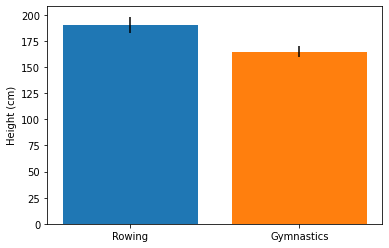

In [19]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

# Adding error-bars to a plot
Adding error-bars to a plot is done by using the errorbars method of the Axes object.

Here, you have two DataFrames loaded: seattle_weather has data about the weather in Seattle and austin_weather has data about the weather in Austin. Each DataFrame has a column "MONTH" that has the names of the months, a column "MLY-TAVG-NORMAL" that has the average temperature in each month and a column "MLY-TAVG-STDDEV" that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

Instructions
100 XP
Use the ax.errorbar method to add the Seattle data: the "MONTH" column as x values, the "MLY-TAVG-NORMAL" as y values and "MLY-TAVG-STDDEV" as yerr values.
Add the Austin data: the "MONTH" column as x values, the "MLY-TAVG-NORMAL" as y values and "MLY-TAVG-STDDEV" as yerr values.
Set the y-axis label as "Temperature (Fahrenheit)".

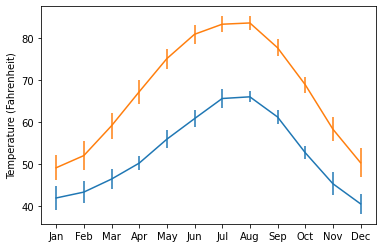

In [20]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'],yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'],yerr=austin_weather['MLY-TAVG-STDDEV']) 

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

# Creating boxplots
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

Again, you will have the mens_rowing and mens_gymnastics DataFrames available to you, and both of these DataFrames have columns called "Height" that you will compare.

Instructions
0 XP
Create a boxplot that contains the "Height" column for mens_rowing on the left and mens_gymnastics on the right.
Add x-axis tick labels: "Rowing" and "Gymnastics".
Add a y-axis label: "Height (cm)".

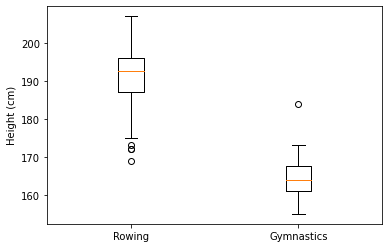

In [21]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

# Simple scatter plot
Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In this exercise, you will create a scatter plot of the climate_change data. This DataFrame, which is already loaded, has a column "co2" that indicates the measurements of carbon dioxide every month and another column, "relative_temp" that indicates the temperature measured at the same time.

Instructions
0 XP
Using the ax.scatter method, add the data to the plot: "co2" on the x-axis and "relative_temp" on the y-axis.
Set the x-axis label to "CO2 (ppm)".
Set the y-axis label to "Relative temperature (C)"

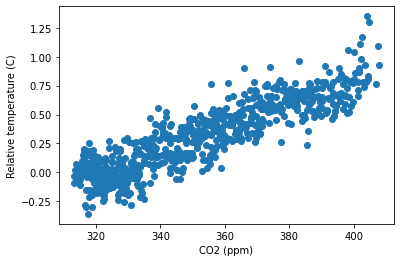

In [22]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change["co2"], climate_change["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

# Encoding time by color
The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

Instructions
100 XP
Using the ax.scatter method add a scatter plot of the "co2" column (x-axis) against the "relative_temp" column.
Use the c key-word argument to pass in the index of the DataFrame as input to color each point according to its date.
Set the x-axis label to "CO2 (ppm)" and the y-axis label to "Relative temperature (C)".

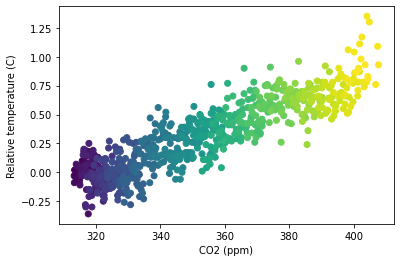

In [23]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()